# Input space optimization

In this toy example, we directly optimize point configurations in 2D. This is motivated by the following paper:

**A Topology Layer for Machine Learning**     
R. Brüel-Gabrielsson, B. J. Nelson, A. Dwaraknath, P. Skraba, L. J. Guibas and G. Carlsson     
arXiv, 2019    
[PDF](https://arxiv.org/abs/1905.12200)

**Note**: In all the following examples, we use the $l_1$ norm during Vietoris-Rips PH computation (whereas the paper mentioned above uses $l_2$).


In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import torch
import matplotlib.pyplot as plt
from chofer_torchex.pershom import vr_persistence_l1

device = "cuda"

## Data

The toy data generated for this example is sampled from a 2D uniform distribution in $[0,1]^2$. In particular, we sample 300 points.

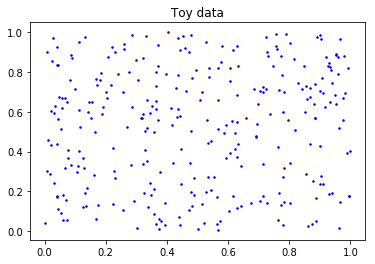

In [27]:
np.random.seed(1234)
toy_data = np.random.rand(300, 2)

plt.figure()
plt.plot(toy_data[:, 0], toy_data[:, 1], 'b.', markersize=3)
plt.title('Toy data');

### Example 1

**Task**: Optimize for uniform distribution of H0 lifetimes.

Iteration:   1 | Loss: 15.35
Iteration:  20 | Loss: 5.85
Iteration:  40 | Loss: 3.74
Iteration:  60 | Loss: 2.66
Iteration:  80 | Loss: 2.00
Iteration: 100 | Loss: 1.69


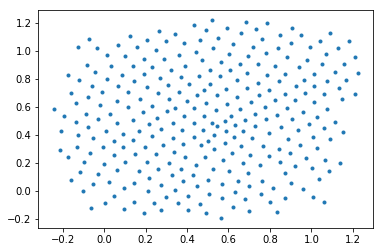

In [28]:
X = torch.tensor(
    toy_data, 
    device=device, 
    requires_grad=True)

opt = torch.optim.Adam([X], lr=0.01)

for i in range(1,100+1):
    pers = vr_persistence_l1(X, 1, 0)
    h_0 = pers[0][0]
    
    lt = h_0[:, 1] # H0 lifetimes
    loss = (lt - 0.1).abs().sum()
    
    if i % 20 == 0 or i == 1:
        print('Iteration: {:3d} | Loss: {:.2f}'.format(i, loss.item()))
    
    opt.zero_grad()
    loss.backward()
    opt.step()    
    
X = X.cpu().detach().numpy()
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'b.');


### Example 2

**Task**: Minimize (non-essential) H0 lifetimes (i.e., a slightly modified as in *Brüel-Gabrielsson et al., arXiv 2019, Fig. 1 top-right)

Iteration:   1 | Loss: 14.74
Iteration:  20 | Loss: 7.25
Iteration:  40 | Loss: 5.65
Iteration:  60 | Loss: 4.87
Iteration:  80 | Loss: 4.43
Iteration: 100 | Loss: 4.10


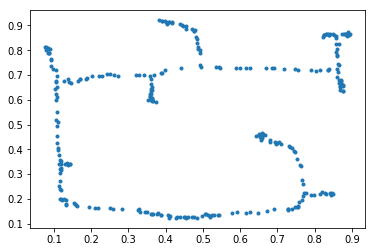

In [29]:
X = torch.tensor(
    toy_data, 
    device=device, 
    requires_grad=True)

opt = torch.optim.Adam([X], lr=0.01)

for i in range(1,100+1):
    pers = vr_persistence_l1(X, 1, 0)
    h_0 = pers[0][0]
    
    lt = h_0[:, 1] # non-essential H0 lifetimes
    loss = lt.sum()
    
    if i % 20 == 0 or i == 1:
        print('Iteration: {:3d} | Loss: {:.2f}'.format(i, loss.item()))
    
    opt.zero_grad()
    loss.backward()
    opt.step()    
    
X = X.cpu().detach().numpy()
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'b.');


### Example 3

**Task**: Increase (non-essential) H0 lifetimes (i.e., a slightly modified version as in *Brüel-Gabrielsson et al., arXiv 2019, Fig. 1 top-left)

Iteration:   1 | Loss: -14.74
Iteration:  20 | Loss: -26.88
Iteration:  40 | Loss: -33.20
Iteration:  60 | Loss: -38.44
Iteration:  80 | Loss: -43.29
Iteration: 100 | Loss: -47.90


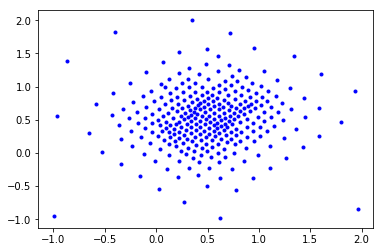

In [31]:
X = torch.tensor(
    toy_data, 
    device=device, 
    requires_grad=True)

opt = torch.optim.Adam([X], lr=0.01)

for i in range(1,100+1):
    pers = vr_persistence_l1(X, 1, 0)
    h_0 = pers[0][0]
    
    lt = -h_0[:, 1] # non-essential H0 lifetimes
    loss = lt.sum()
    
    if i % 20 == 0 or i == 1:
        print('Iteration: {:3d} | Loss: {:.2f}'.format(i, loss.item()))
    
    opt.zero_grad()
    loss.backward()
    opt.step()    
    
X = X.cpu().detach().numpy()
plt.figure()
plt.plot(X[:, 0], X[:, 1], 'b.');
